# About Dataset

The dataset provides insights into customer satisfaction levels within an undisclosed airline company. While the specific airline name is withheld, the dataset is rich in information, containing 22 columns and 129,880 rows. It aims to predict whether future customers will be satisfied based on various parameters included in the dataset.

The columns likely cover a range of factors that influence customer satisfaction, such as flight punctuality, service quality, and so. By analyzing this dataset, airlines can gain valuable insights into the factors that contribute to customer satisfaction and tailor their services accordingly to enhance the overall customer experience.

- **Satisfaction:** Indicates the satisfaction level of the customer.
- **Customer Type:** Type of customer: 'Loyal Customer' or 'Disloyal Customer’.
- **Age:** Age of the customer.
- **Type of Travel:** Purpose of the travel: 'Business travel' or 'Personal Travel’.
- **Class:**	Class of travel: 'Business', 'Eco', or 'Eco Plus’.
- **Flight Distance:** The distance of the flight in kilometres
- **Seat comfort:** Rating of seat comfort provided during the flight (1 to 5).
- **Departure/Arrival time convenient** Rating of the convenience of departure/arrival time (1 to 5).
- **Food and drink:** Rating of food and drink quality provided during the flight (1 to 5).
- **Gate location:**	Rating of gate location convenience (1 to 5).
- **Inflight wifi service:**	Rating of inflight wifi service satisfaction (1 to 5).
- **Inflight entertainment:** Rating of inflight entertainment satisfaction (1 to 5).
- **Online support:** Rating of online customer support satisfaction (1 to 5).
- **Ease of Online booking:** Rating of ease of online booking satisfaction (1 to 5).
- **On-board service:** Rating of on-board service satisfaction (1 to 5).
- **Leg room service:** Rating of leg room service satisfaction (1 to 5).
- **Baggage handling:** Rating of baggage handling satisfaction (1 to 5).
- **Checkin service:** Rating of check-in service satisfaction (1 to 5).
- **Cleanliness:** Rating of cleanliness satisfaction (1 to 5).
- **Online boarding:** Rating of online boarding satisfaction (1 to 5).
- **Departure Delay in Minutes:** Total departure delay in minutes.
- **Arrival Delay in Minutes:** Total arrival delay in minutes.

# Importing Libraries

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, classification_report
warnings.filterwarnings('ignore')
import numpy as np
import pickle


# Functions for plot customizations

In [78]:
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

# Data Exploration & Cleaning

In [79]:
customer_df = pd.read_csv('Airline_customer_satisfaction.csv')
customer_df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [80]:
customer_df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [81]:
customer_df.shape

(129880, 22)

- There are 129880 row and 22 columns in the dataset

In [82]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

- The majority of the columns in the dataset consist of numeric values, primarily representing ratings.

In [83]:
customer_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [84]:
customer_df.describe(include = 'object')

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


In [85]:
for col in customer_df.describe(include='object').columns:
    print('Column Name: ',col)
    print(customer_df[col].unique())
    print('-'*50)

Column Name:  satisfaction
['satisfied' 'dissatisfied']
--------------------------------------------------
Column Name:  Customer Type
['Loyal Customer' 'disloyal Customer']
--------------------------------------------------
Column Name:  Type of Travel
['Personal Travel' 'Business travel']
--------------------------------------------------
Column Name:  Class
['Eco' 'Business' 'Eco Plus']
--------------------------------------------------


## Handling Null Values

In [86]:
customer_df.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [87]:
customer_df['Arrival Delay in Minutes'].fillna(customer_df['Arrival Delay in Minutes'].mean(), inplace=True)

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

## Handling Outliers

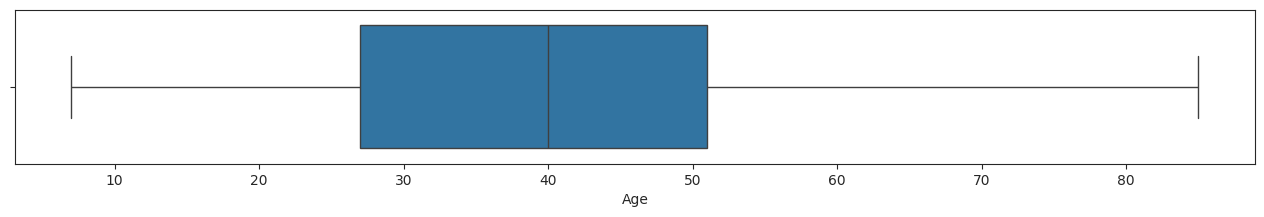

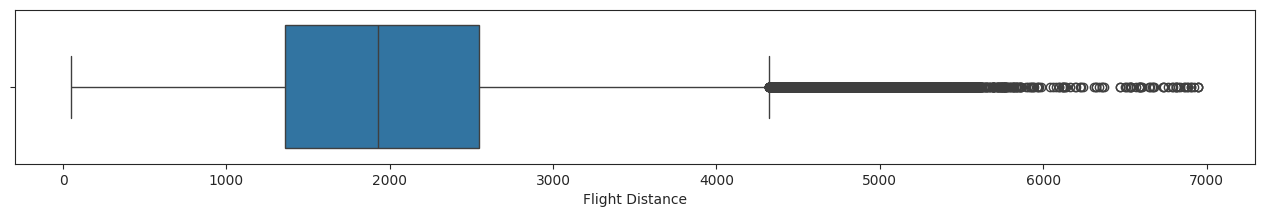

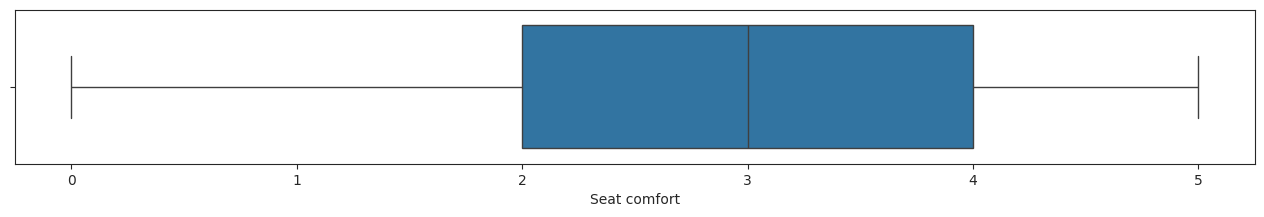

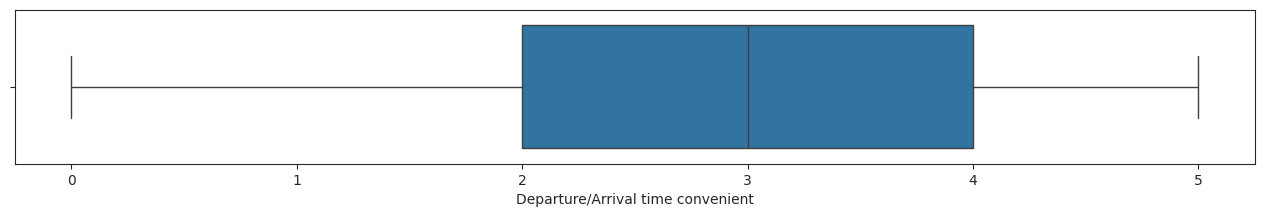

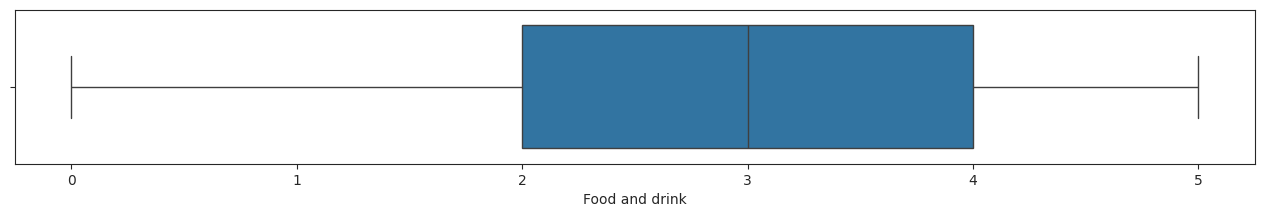

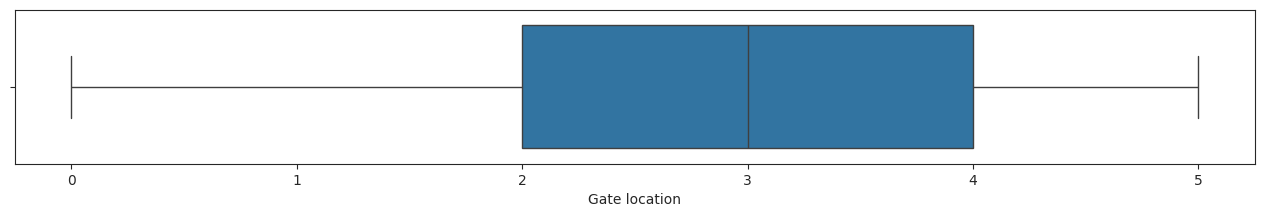

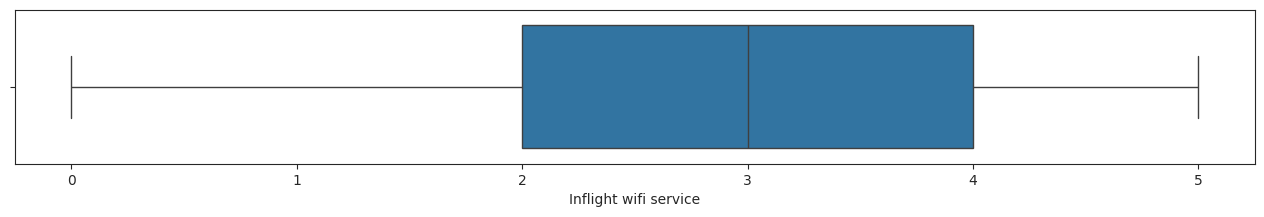

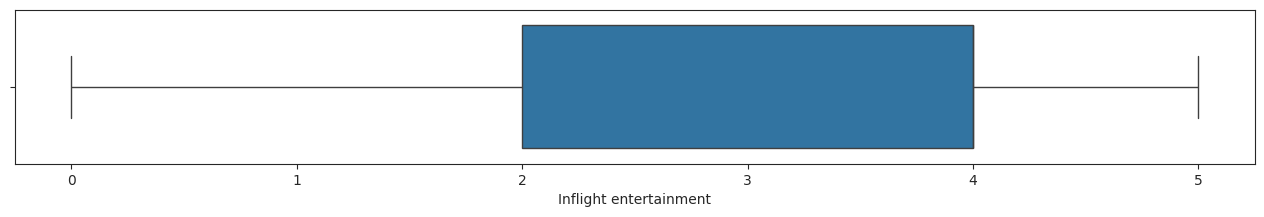

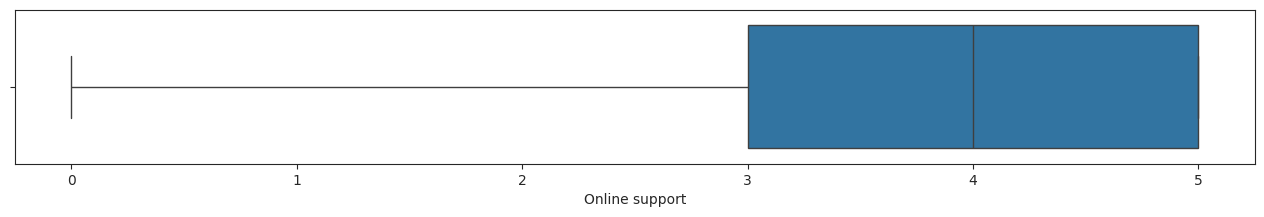

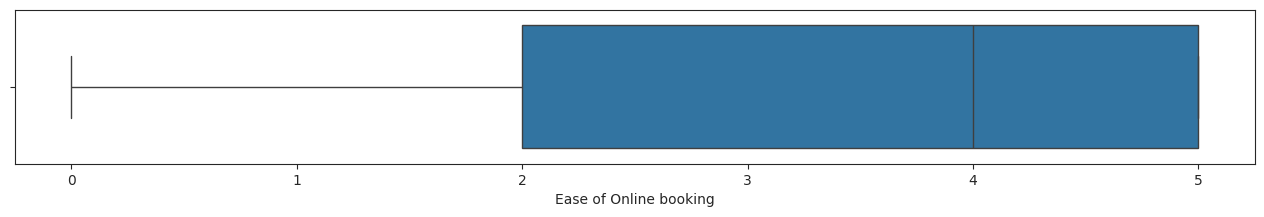

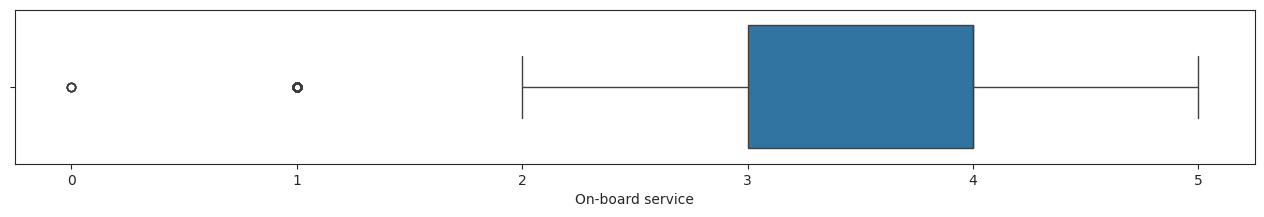

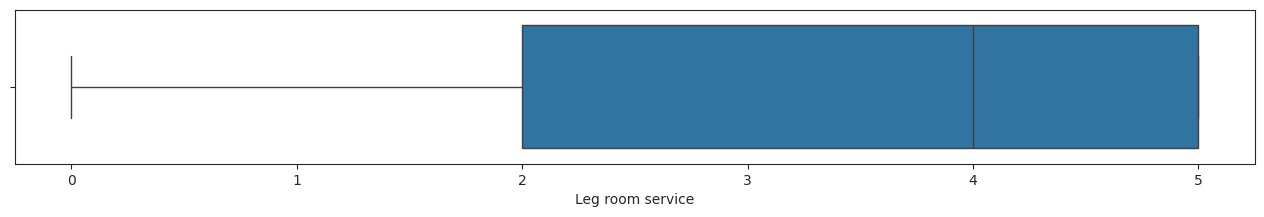

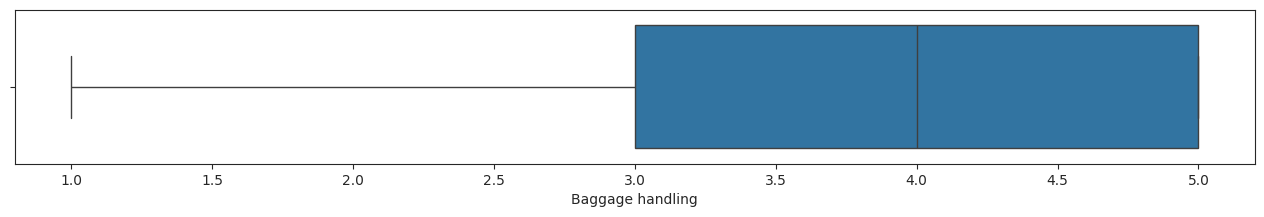

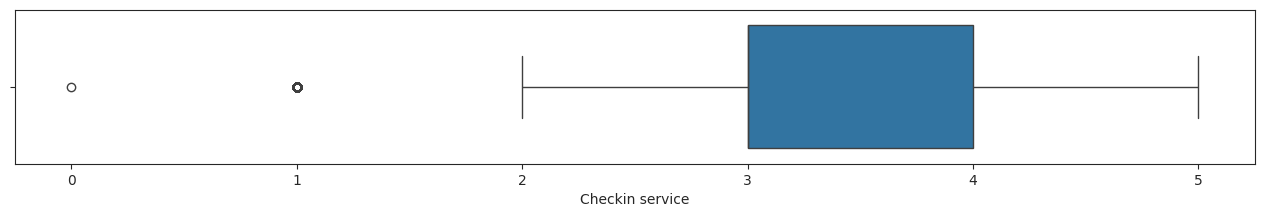

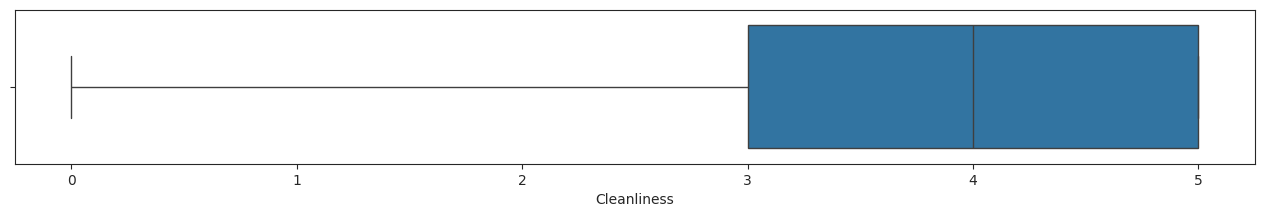

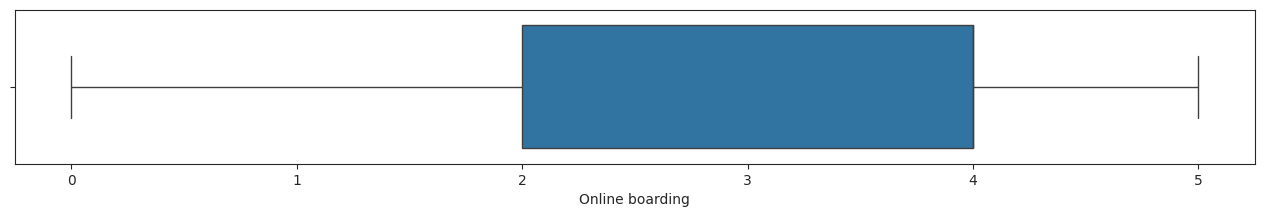

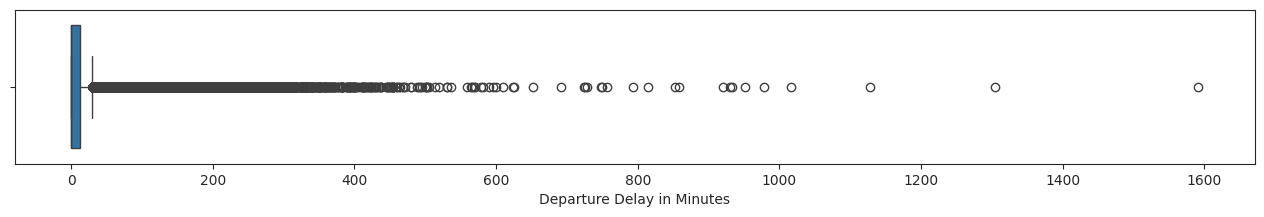

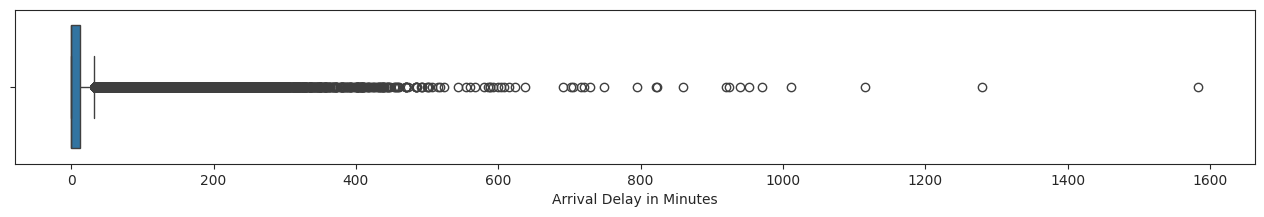

In [89]:
for col in customer_df.describe().columns:
    set_size_style(16,2,'ticks')
    sns.boxplot(data=customer_df, x=col)
    plt.show()

In [90]:
customer_df = customer_df.drop(customer_df[customer_df['Departure Delay in Minutes'] > 500 ].index)
customer_df = customer_df.drop(customer_df[customer_df['Arrival Delay in Minutes'] > 500 ].index)
customer_df = customer_df.drop(customer_df[customer_df['Flight Distance'] > 5500 ].index)
customer_df.reset_index(drop=True, inplace=True)
customer_df.shape

(129587, 22)

# Exploratory Data Analysis

In [91]:
customer_df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

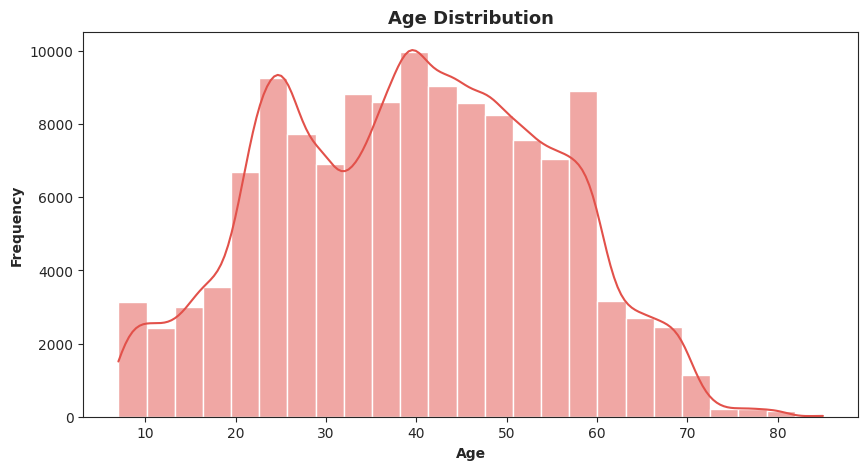

In [92]:
set_size_style(10,5)
ax = sns.histplot(customer_df['Age'],bins=25,color= sns.color_palette('Spectral')[0],kde=True)
customize_plot(ax,'Age Distribution','Age','Frequency',13,10)

- The majority of individuals fall within the age range of 20 to 60 years, with a notable concentration around the age of 40.

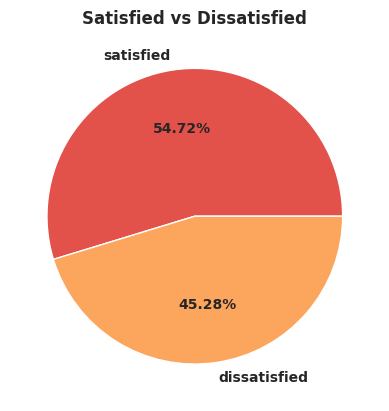

In [93]:
plt.title("Satisfied vs Dissatisfied", fontsize = 12, weight='bold')
plt.pie(customer_df['satisfaction'].value_counts(),labels=customer_df['satisfaction'].value_counts().index,radius=1, autopct='%.2f%%',textprops={'fontsize': 10, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.show()

- The number of satisfied customers exceeds the number of dissatisfied customers, indicating a prevailing trend towards positive experiences with the service or product.

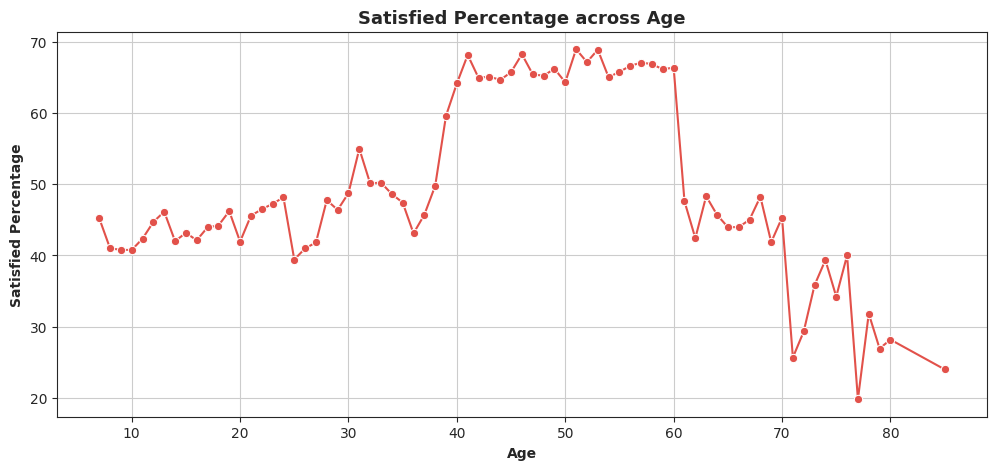

In [94]:
set_size_style(12,5)
age_groups = customer_df.groupby('Age')['satisfaction'].value_counts(normalize=True).unstack()
satisfied_percentage = age_groups['satisfied'] * 100
ax =sns.lineplot(x=satisfied_percentage.index, y=satisfied_percentage.values, marker='o', color= sns.color_palette('Spectral')[0])
customize_plot(ax, 'Satisfied Percentage across Age', 'Age', 'Satisfied Percentage',13,10)
plt.grid(True)
plt.show()

- Individuals in their 40s and 50s exhibit satisfaction with airline services.
- Conversely, older individuals above the age of 70 express significantly higher levels of dissatisfaction with the services provided

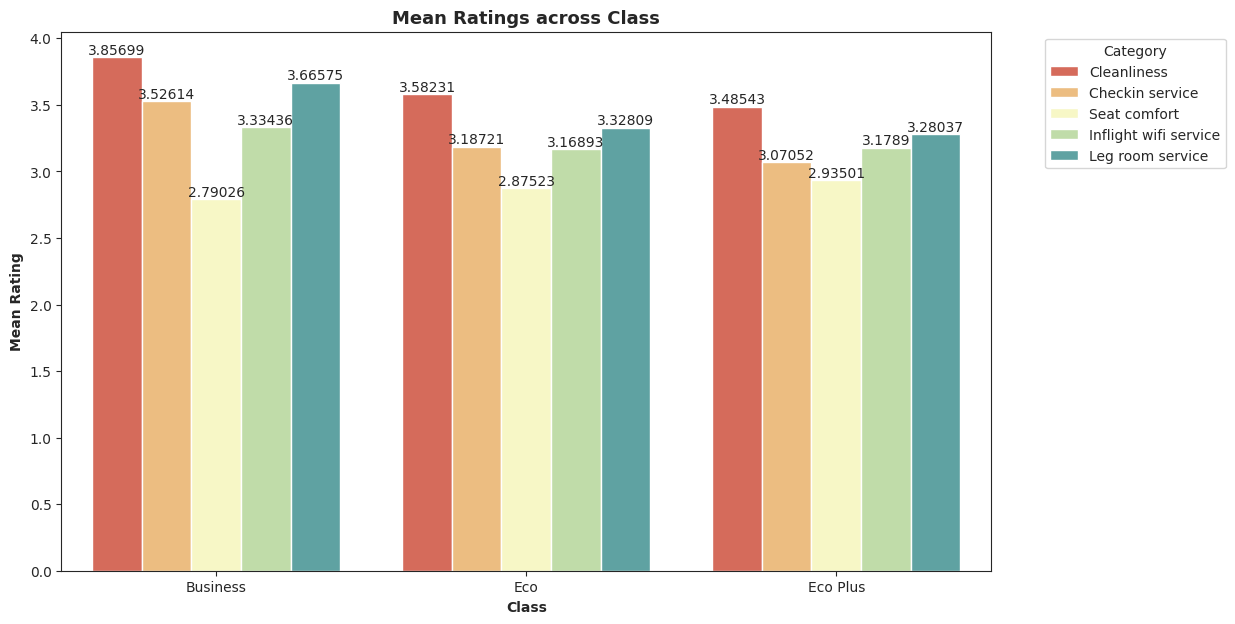

In [95]:
set_size_style(12,7)
class_ratings = customer_df.groupby('Class').agg({'Cleanliness':'mean',
                                                       'Checkin service' : 'mean',
                                                       'Seat comfort':'mean',
                                                       'Inflight wifi service':'mean',
                                                       'Leg room service':'mean'}).reset_index()
class_ratings_melted = pd.melt(class_ratings, id_vars='Class', var_name='Category', value_name='Mean Rating')
ax = sns.barplot(x='Class', y='Mean Rating', hue='Category', data=class_ratings_melted, palette='Spectral')
for c in ax.containers:
        ax.bar_label(c)
customize_plot(ax, 'Mean Ratings across Class', 'Class', 'Mean Rating',13,10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


- Travelers in the business class generally give higher average ratings for cleanliness, check-in experience, in-flight wifi, and legroom service.
- Interestingly, passengers in the business class tend to rate seat comfort comparatively lower.

<Axes: >

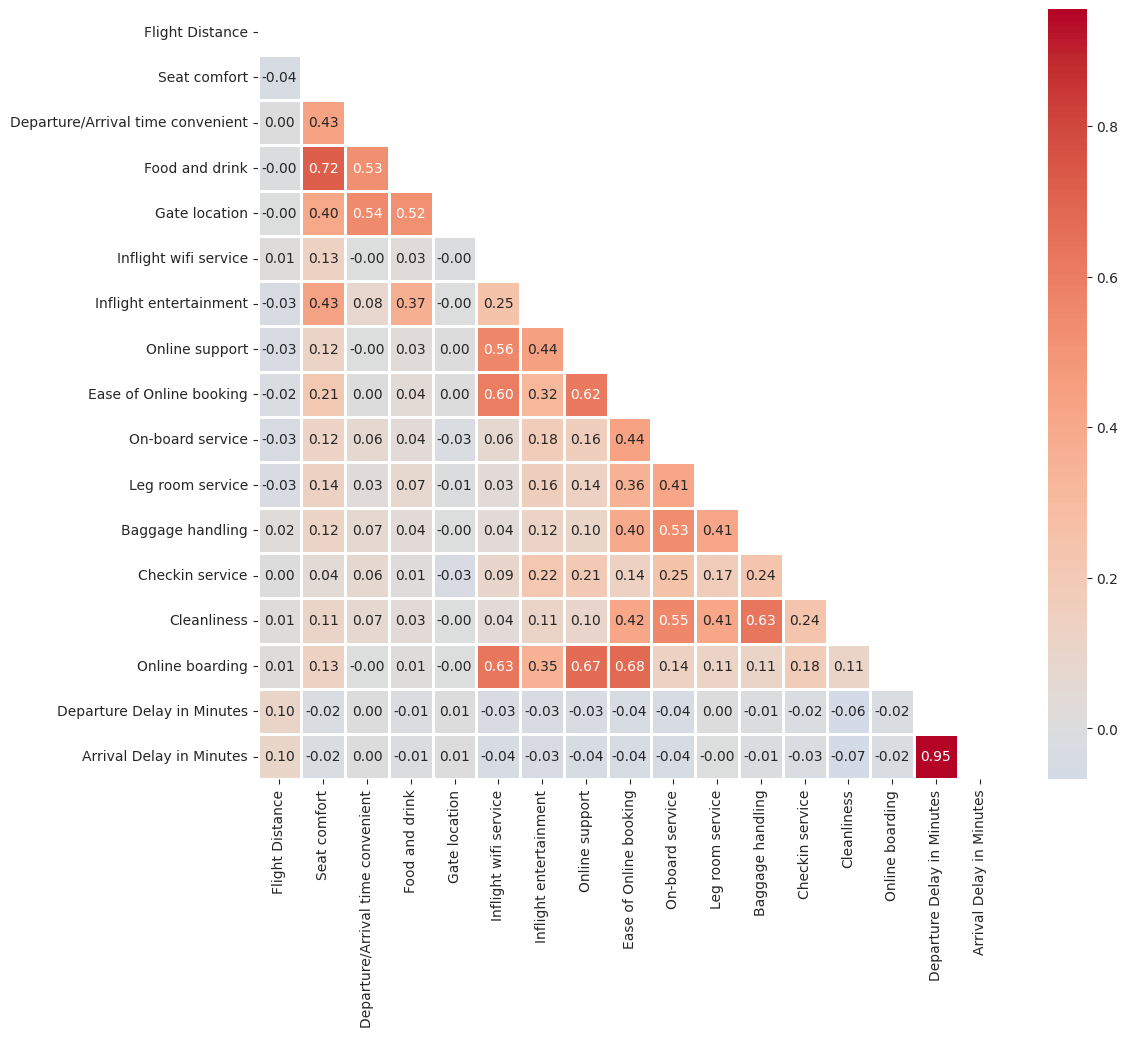

In [96]:
corr = customer_df[['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f",cmap = 'coolwarm')

In [97]:
customer_df.drop(columns = ['Arrival Delay in Minutes'],inplace = True)

In [98]:
customer_df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

# Encoding Categorical Features

In [99]:
dummies=pd.get_dummies(customer_df['Class'], dtype=int)
dummies

,Business,Eco,Eco Plus
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
129582,0,1,0
129583,1,0,0
129584,0,1,0
129585,0,1,0


In [100]:
customer_encoded = pd.concat([customer_df,dummies], axis = 'columns')
customer_encoded.drop(columns = ['Class'], inplace=True)
customer_encoded

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Business,Eco,Eco Plus
0,satisfied,Loyal Customer,65,Personal Travel,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0,1,0
1,satisfied,Loyal Customer,47,Personal Travel,2464,0,0,0,3,0,...,4,4,4,2,3,2,310,1,0,0
2,satisfied,Loyal Customer,15,Personal Travel,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0,1,0
3,satisfied,Loyal Customer,60,Personal Travel,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0,1,0
4,satisfied,Loyal Customer,70,Personal Travel,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129582,satisfied,disloyal Customer,29,Personal Travel,1731,5,5,5,3,2,...,3,3,4,4,4,2,0,0,1,0
129583,dissatisfied,disloyal Customer,63,Personal Travel,2087,2,3,2,4,2,...,2,3,3,1,2,1,174,1,0,0
129584,dissatisfied,disloyal Customer,69,Personal Travel,2320,3,0,3,3,3,...,4,3,4,2,3,2,155,0,1,0
129585,dissatisfied,disloyal Customer,66,Personal Travel,2450,3,2,3,2,3,...,3,2,3,2,1,2,193,0,1,0


In [101]:
customer_encoded['Customer Type'] = customer_encoded['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
customer_encoded['Type of Travel'] = customer_encoded['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})
customer_encoded['satisfaction'] = customer_encoded['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

customer_encoded

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Business,Eco,Eco Plus
0,1,1,65,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0,1,0
1,1,1,47,1,2464,0,0,0,3,0,...,4,4,4,2,3,2,310,1,0,0
2,1,1,15,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0,1,0
3,1,1,60,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0,1,0
4,1,1,70,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129582,1,0,29,1,1731,5,5,5,3,2,...,3,3,4,4,4,2,0,0,1,0
129583,0,0,63,1,2087,2,3,2,4,2,...,2,3,3,1,2,1,174,1,0,0
129584,0,0,69,1,2320,3,0,3,3,3,...,4,3,4,2,3,2,155,0,1,0
129585,0,0,66,1,2450,3,2,3,2,3,...,3,2,3,2,1,2,193,0,1,0


# Splitting Data

In [102]:
X = customer_encoded.drop(columns = ['satisfaction'])
y = customer_encoded['satisfaction']

In [103]:
X.shape, y.shape

((129587, 22), (129587,))

In [104]:
X

,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Business,Eco,Eco Plus
0,1,65,1,265,0,0,0,2,2,4,...,3,0,3,5,3,2,0,0,1,0
1,1,47,1,2464,0,0,0,3,0,2,...,4,4,4,2,3,2,310,1,0,0
2,1,15,1,2138,0,0,0,3,2,0,...,3,3,4,4,4,2,0,0,1,0
3,1,60,1,623,0,0,0,3,3,4,...,1,0,1,4,1,3,0,0,1,0
4,1,70,1,354,0,0,0,3,4,3,...,2,0,2,4,2,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129582,0,29,1,1731,5,5,5,3,2,5,...,3,3,4,4,4,2,0,0,1,0
129583,0,63,1,2087,2,3,2,4,2,1,...,2,3,3,1,2,1,174,1,0,0
129584,0,69,1,2320,3,0,3,3,3,2,...,4,3,4,2,3,2,155,0,1,0
129585,0,66,1,2450,3,2,3,2,3,2,...,3,2,3,2,1,2,193,0,1,0


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((103669, 22), (103669,))

# Scaling Data

In [106]:
X_train.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Business', 'Eco', 'Eco Plus'],
      dtype='object')

In [107]:
scaler = StandardScaler()

In [108]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selecting Best Model

CV Score (Mean) K-Nearest Neighbors: 0.9180082725811682
CV Score (Mean) Logistic Regression: 0.8295343686903128
CV Score (Mean) Random Forest Classifier: 0.9544897729107551
CV Score (Mean) Decision Tree Classifier: 0.9336928170688497


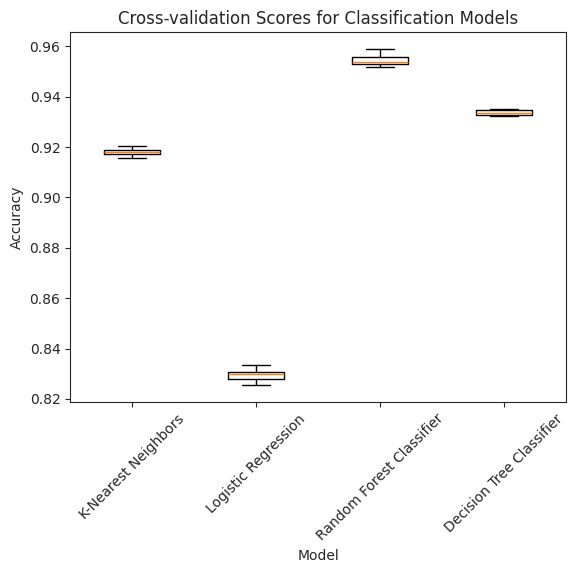

In [109]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
}
results = []

for name, model in models.items():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    print(f'CV Score (Mean) {name}: {np.mean(cv_results)}')
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.title('Cross-validation Scores for Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

- Random Forest Classifier outperforms other classification models

In [110]:
rf = RandomForestClassifier(random_state=42)

In [111]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [112]:
y_pred = rf.predict(X_test)


## Model Evaluation

<Figure size 800x600 with 0 Axes>

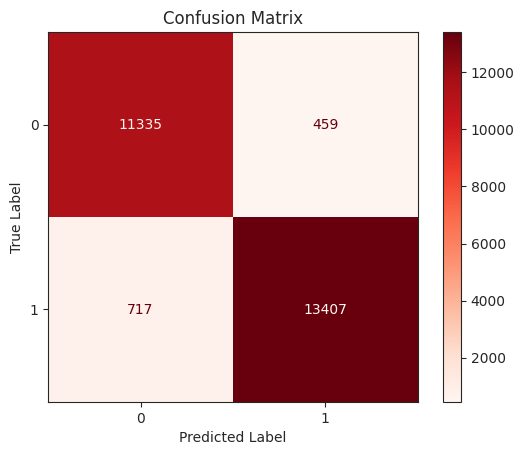

In [113]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Reds', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [114]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11794
           1       0.97      0.95      0.96     14124

    accuracy                           0.95     25918
   macro avg       0.95      0.96      0.95     25918
weighted avg       0.95      0.95      0.95     25918



- The Random Forest Model achieves high precision, recall, and F1-score for both classes, indicating that it performs well in classifying both dissatisfied and satisfied customers.
- The overall accuracy of 96% suggests that the model is accurate in predicting the customer satisfaction status.

- Let's try Extreme Gradient Boosting

# Extreme Gradient Boosting (XGBoost Classifier)

In [115]:
customer_dmatrix = xgb.DMatrix(data=X_train_scaled,label=y_train)
params={'binary':'logistic'}
cv_results = xgb.cv(dtrain=customer_dmatrix,
                    params=params,
                    nfold=4,
                    metrics="error",
                    as_pandas=True,
                    seed=42)

In [116]:
cv_results['test-accuracy-mean'] = 1 - cv_results['test-error-mean']
mean_accuracy = cv_results['test-accuracy-mean'].iloc[-1]
print("Mean Accuracy (CV):", mean_accuracy)

Mean Accuracy (CV): 0.9255901202656526


- Now, let's proceed with hyperparameter tuning to improve the accuracy.

## Hyperparameter tuning

### GridSearchCV

In [117]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [200],
    'max'
    'subsample': [0.3, 0.5, 0.9]
}
xgboost_model = xgb.XGBClassifier(objective = 'binary:logistic',seed=42)
grid_xgboost = GridSearchCV(
    estimator=xgboost_model,
    param_grid=xgb_param_grid,
    scoring='accuracy',
    cv=4,
    verbose=1
)
grid_xgboost.fit(X_train_scaled, y_train)
print("Best parameters found:", grid_xgboost.best_params_)
print("Best Accuracy Score:", grid_xgboost.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best parameters found: {'learning_rate': 0.5, 'maxsubsample': 0.3, 'n_estimators': 200}
Best Accuracy Score: 0.9540846358547117


### RandomizedSearchCV

In [118]:
xgb_param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': [200],
    'subsample': np.arange(0.3, 1.0, 0.1),
    'max_depth': np.arange(3, 10, 1),
    'colsample_bytree': np.arange(0.3, 1.0, 0.1)
}
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', seed=42)
random_xgboost = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=xgb_param_grid,
    n_iter=15,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42
)

random_xgboost.fit(X_train_scaled, y_train)
print("Best parameters found:", random_xgboost.best_params_)
print("Best Accuracy Score:", random_xgboost.best_score_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters found: {'subsample': np.float64(0.7000000000000002), 'n_estimators': 200, 'max_depth': np.int64(9), 'learning_rate': np.float64(0.11), 'colsample_bytree': np.float64(0.8000000000000003)}
Best Accuracy Score: 0.9563032393487019


In [119]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic',
                              subsample= 0.7,
                              n_estimators= 200,
                              max_depth = 9,
                              learning_rate = 0.11,
                              colsample_bytree=0.8)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
y_pred = xgb_model.predict(X_test_scaled)

## Model Evaluation

<Figure size 800x600 with 0 Axes>

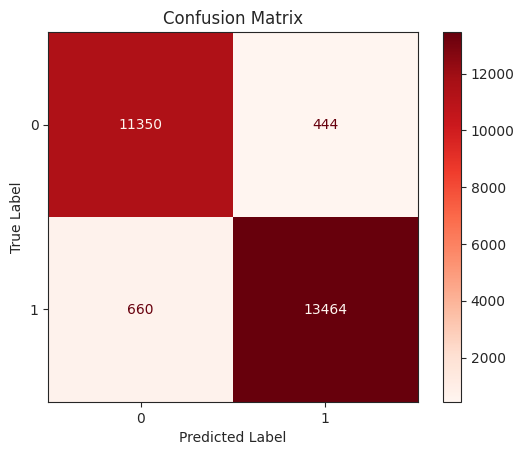

In [121]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test, cmap='Reds', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [122]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11794
           1       0.97      0.95      0.96     14124

    accuracy                           0.96     25918
   macro avg       0.96      0.96      0.96     25918
weighted avg       0.96      0.96      0.96     25918



In [123]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [124]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Conclusion

- Both Random Forest and XGBoost models exhibit comparable performance metrics, including accuracy, precision, recall, and F1-score.
- However, the XGBoost model demonstrates a slightly lower number of false positives and false negatives compared to the Random Forest model.
- This suggests that the XGBoost model outperforms the Random Forest model slightly in terms of minimizing classification errors.